In [1]:
from dataloader import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#### Load Main Dataset

In [2]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
testX, _ = read_csv('data/train.csv', ylabel='price')

(array([6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0243e+04]),
 array([-77.06536425, -57.25650467, -37.44764508, -17.6387855 ,
          2.17007409,  21.97893367,  41.78779326,  61.59665284,
         81.40551243, 101.21437201, 121.0232316 ]),
 <a list of 10 Patch objects>)

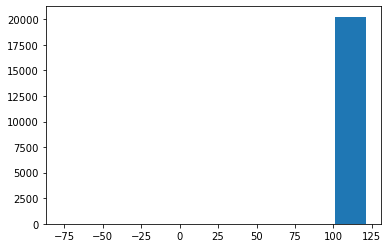

In [4]:
plt.hist(trainX['lng'])

In [3]:
def outlier_index(inp_df):
    percentile25 = inp_df.quantile(0.25)
    percentile75 = inp_df.quantile(0.75)
    iqr = percentile75 - percentile25
    lower_range = percentile25 - 1.5 * iqr
    upper_range = percentile75 + 1.5 * iqr

    lower_bad = inp_df[inp_df < lower_range].index
    upper_bad = inp_df[inp_df > upper_range].index
    all_bad = lower_bad.union(upper_bad)
    
    return all_bad

In [4]:
lat_outliers, lng_outliers, price_outliers = \
    outlier_index(trainX['lat']), outlier_index(trainX['lng']), outlier_index(trainY)

all_outliers = lat_outliers.union(lng_outliers).union(price_outliers)
trainX, trainY = trainX.drop(all_outliers), trainY.drop(all_outliers)

lat_arr, lng_arr = trainX['lat'].astype(float).to_numpy(), trainX['lng'].astype(float).to_numpy()
price_arr = trainY.astype(float).to_numpy()

#### Load Auxiliary Data

In [5]:
commercial_centres, _ = read_csv('data/auxiliary-data/sg-commerical-centres.csv')
mrt_stations, _ = read_csv('data/auxiliary-data/sg-mrt-stations.csv')
primary_schools, _ = read_csv('data/auxiliary-data/sg-primary-schools.csv')
secondary_schools, _ = read_csv('data/auxiliary-data/sg-secondary-schools.csv')
shopping_malls, _ = read_csv('data/auxiliary-data/sg-shopping-malls.csv')

#### Create Price Heatmap

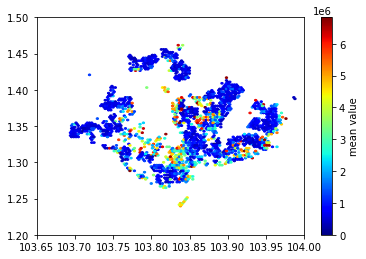

In [6]:
plt.hexbin(lng_arr, lat_arr, C=price_arr, gridsize=100, cmap=cm.jet, bins=None)
# plt.hexbin(lng_arr, lat_arr, C=np.ones(len(lat_arr)), gridsize=100, cmap=cm.jet, bins=None)
plt.axis([103.65, 104.0, 1.2, 1.5])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()   

#### Create Auxiliary Data Heatmap

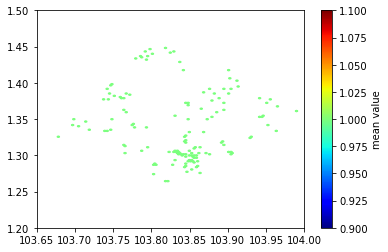

In [7]:
# aux_data = commercial_centres
# aux_data = mrt_stations
# aux_data = primary_schools
# aux_data = secondary_schools
aux_data = shopping_malls


lat_arr, lng_arr = aux_data['lat'].astype(float).to_numpy(), aux_data['lng'].astype(float).to_numpy()

plt.hexbin(lng_arr, lat_arr, C=np.ones(len(lat_arr)), gridsize=100, cmap=cm.jet, bins=None)
plt.axis([103.65, 104.0, 1.2, 1.5])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show() 